In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from collections import Counter
from deep_translator import GoogleTranslator
from autocorrect import Speller
import re
#nltk.download('stopwords')
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer



#from textblob import TextBlob
#from urlextract import URLExtract
from langdetect import detect

train_data = pd.read_csv('mediaeval-2015-trainingset.txt', sep="\t", header=0)
test_data = pd.read_csv('mediaeval-2015-testset.txt', sep="\t", header=0)



#exploring dataset
train_data.head(10)

,tweetId,tweetText,userId,imageId(s),username,timestamp,label
0,263046056240115712,¿Se acuerdan de la película: “El día después d...,21226711,sandyA_fake_46,iAnnieM,Mon Oct 29 22:34:01 +0000 2012,fake
1,262995061304852481,@milenagimon: Miren a Sandy en NY! Tremenda i...,192378571,sandyA_fake_09,CarlosVerareal,Mon Oct 29 19:11:23 +0000 2012,fake
2,262979898002534400,"Buena la foto del Huracán Sandy, me recuerda a...",132303095,sandyA_fake_09,LucasPalape,Mon Oct 29 18:11:08 +0000 2012,fake
3,262996108400271360,Scary shit #hurricane #NY http://t.co/e4JLBUfH,241995902,sandyA_fake_29,Haaaaarryyy,Mon Oct 29 19:15:33 +0000 2012,fake
4,263018881839411200,My fave place in the world #nyc #hurricane #sa...,250315890,sandyA_fake_15,princess__natt,Mon Oct 29 20:46:02 +0000 2012,fake
5,263364439582060545,42nd #time #square #NYC #subway #hurricane htt...,163674788,sandyA_fake_23,classycg,Tue Oct 30 19:39:10 +0000 2012,fake
6,262927032705490944,Just in time for #halloween a photo of #hurric...,246153081,sandyA_fake_14,j_unit87,Mon Oct 29 14:41:04 +0000 2012,fake
7,263321078884077568,Crazy pic of #Hurricane #Sandy prayers go out ...,199565482,sandyA_fake_29,MrBlakMagik,Tue Oct 30 16:46:52 +0000 2012,fake
8,263111677485142017,#sandy #newyork #hurricane #statueofliberty #U...,78475739,sandyA_fake_15,safi37,Tue Oct 30 02:54:46 +0000 2012,fake
9,262977091983785985,#nyc #hurricane http://t.co/Gv3QxZlq,869777653,sandyA_fake_29,kingmichael03,Mon Oct 29 17:59:59 +0000 2012,fake


In [2]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14277 entries, 0 to 14276
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweetId     14277 non-null  int64 
 1   tweetText   14277 non-null  object
 2   userId      14277 non-null  int64 
 3   imageId(s)  14277 non-null  object
 4   username    14277 non-null  object
 5   timestamp   14277 non-null  object
 6   label       14277 non-null  object
dtypes: int64(2), object(5)
memory usage: 780.9+ KB


In [3]:
train_data.isnull().sum().sum()

0

In [4]:
#count number of real values
num_fake = (train_data.label=='fake').sum()
num_humor = (train_data.label=='humor').sum()
num_real = (train_data.label=='real').sum()
print('real count: ',num_real)
print('fake count: ',num_fake)
print('humor count: ',num_humor)

num_fake = (test_data.label=='fake').sum()
num_humor = (test_data.label=='humor').sum()
num_real = (test_data.label=='real').sum()
print('real count: ',num_real)
print('fake count: ',num_fake)
print('humor count: ',num_humor)

real count:  4921
fake count:  6742
humor count:  2614
real count:  1209
fake count:  2546
humor count:  0


In [5]:
val_counts = train_data['tweetText'].value_counts().values
# importing the collections module
import collections
# getting the elements frequencies using Counter class
elements_count = collections.Counter(val_counts)
# printing the element and the frequency
for key, value in elements_count.items():
    print(f"{key}: {value}")

#print total number of duplicated tweets

42: 1
36: 2
33: 1
32: 1
29: 1
23: 1
19: 1
17: 3
16: 1
15: 3
14: 4
13: 5
12: 7
11: 7
10: 8
9: 2
8: 7
7: 9
6: 13
5: 28
4: 36
3: 96
2: 627
1: 11512


In [6]:
train_data['tweetText'].describe()

count                                                 14277
unique                                                12376
top       Unbelievable scene flying over #StatenIsland i...
freq                                                     42
Name: tweetText, dtype: object

In [7]:
train_data['username'].describe()


count           14277
unique          13498
top       SAGandAFTRA
freq               16
Name: username, dtype: object

In [8]:
val_counts = train_data['username'].value_counts().values
# importing the collections module
import collections
# getting the elements frequencies using Counter class
elements_count = collections.Counter(val_counts)
# printing the element and the frequency
num_users = 0
num_tweets = 0
#key = number of tweets, value = num users
for key, value in elements_count.items():
    print(f"{key}: {value}")
    if(key > 1):
        num_tweets += key * value
        num_users += value
    
print(num_users, ' users responsible for ',num_tweets)

16: 1
10: 1
9: 1
8: 2
7: 2
6: 3
5: 11
4: 29
3: 74
2: 427
1: 12947
551  users responsible for  1330


In [9]:
#count number of different languages
def lang_detect(text):
    try:
        detected_text = detect(text)
        return detected_text
    except:
        return "error"

#train_data['language'] = train_data['tweetText'].apply(lambda x: lang_detect(x))
#train_data['language'].value_counts()


<AxesSubplot:>

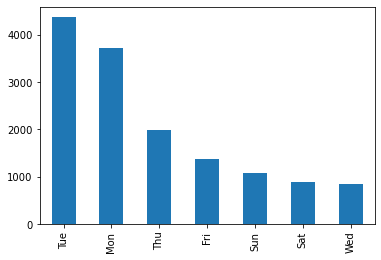

In [10]:
#Mon Oct 29 22:34:01 +0000 2012
#'Tue Mar 11 03: 13: 40 +0000 2014'
def get_date_string(string):
    return string.split()[5] + '-' + (mon_to_num(string.split()[1]) + '-' + string.split()[2]) 
#fake_tweets = train_data.loc[train_data['label'] == ('fake' or 'humor')]
def mon_to_num(mon):
    if mon == 'Jan':
        return '01'
    elif mon == 'Feb':
        return '02'
    elif mon == 'Mar':
        return '03'
    elif mon == 'Apr':
        return '04'
    elif mon == 'May':
        return '05'
    elif mon == 'Jun':
        return '06'
    elif mon == 'Jul':
        return '07'
    elif mon == 'Aug':
        return '08'
    elif mon == 'Sep':
        return '09'
    elif mon == 'Oct':
        return '10'
    elif mon == 'Nov':
        return '11'
    elif mon == 'Dec':
        return '12'
    
#time stamp will be converted to fields weekday, month, year, time, date, datetime
train_data['weekday'] = train_data['timestamp'].apply(lambda x: x.split()[0])
train_data['date']= train_data['timestamp'].apply(lambda x: get_date_string(x))
    
train_data['weekday'].value_counts().plot.bar()


In [11]:
#train_data['date'].describe()
pd.set_option("display.max_rows", None)
train_data['date'].value_counts()

2012-10-30    4163
2012-10-29    3348
2012-11-01    1577
2012-11-04     875
2012-11-02     869
2012-11-03     693
2012-10-31     609
2013-04-19     298
2014-09-11     185
2014-02-07     136
2012-11-05     132
2013-04-17     108
2014-03-18      80
2013-04-18      77
2014-03-10      74
2014-02-08      64
2014-03-19      58
2014-02-09      56
2013-04-20      56
2014-03-09      55
2012-10-28      47
2014-03-11      45
2014-02-10      38
2014-02-06      34
2014-06-02      31
2014-03-20      23
2014-03-24      21
2014-02-11      19
2014-03-23      18
2014-03-14      17
2014-03-12      17
2014-05-01      16
2014-04-16      16
2014-03-27      15
2014-03-08      15
2014-05-02      15
2014-02-12      14
2014-05-08      14
2014-04-17      14
2014-04-05      13
2014-05-09      12
2014-03-13      12
2014-05-19      12
2014-04-07      12
2014-02-05      12
2014-04-19      11
2014-03-22      11
2014-04-18      11
2014-03-17      10
2014-05-03      10
2014-05-06       9
2014-04-13       9
2014-04-14  

In [12]:
#remove weekday and date columns, only used to visualise the data
train_data.drop('weekday', axis=1, inplace=True)
train_data.drop('date', axis=1, inplace=True)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14277 entries, 0 to 14276
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweetId     14277 non-null  int64 
 1   tweetText   14277 non-null  object
 2   userId      14277 non-null  int64 
 3   imageId(s)  14277 non-null  object
 4   username    14277 non-null  object
 5   timestamp   14277 non-null  object
 6   label       14277 non-null  object
dtypes: int64(2), object(5)
memory usage: 780.9+ KB


In [13]:
#Pre-processing

#some entries contain multiple entries, first task is to remove these entries
def removeURLs(text):
    return re.sub(r'(https?://[^\s]+)','', text)
    
#remove URLs
train_data['tweetText']= train_data['tweetText'].apply(lambda x: removeURLs(x))
test_data['tweetText'] = test_data['tweetText'].apply(lambda x: removeURLs(x))
#get length of tweets with URL removed
train_data['length'] = train_data['tweetText'].apply(lambda x: len(x))
test_data['length'] = test_data['tweetText'].apply(lambda x: len(x))

#pd.set_option('display.max_colwidth', None) #allows you to see full fields
#train_data.loc[train_data['length'] > 200]

#every tweet with no URL length more than 217 contains multiple tweets so should be removed
#decided to make 280 the cutoff as this is the max number of characters allowed in a tweet atm
train_data = train_data.loc[train_data['length'] <= 280]
test_data = test_data.loc[test_data['length'] <= 280]

train_data.loc[train_data['length'] > 200]

pd.set_option('display.max_colwidth', None) #allows you to see full fields

train_data.head(20)





,tweetId,tweetText,userId,imageId(s),username,timestamp,label,length
0,263046056240115712,¿Se acuerdan de la película: “El día después de mañana”? Me recuerda a lo que está pasando con el huracán #Sandy.,21226711,sandyA_fake_46,iAnnieM,Mon Oct 29 22:34:01 +0000 2012,fake,114
1,262995061304852481,"@milenagimon: Miren a Sandy en NY! Tremenda imagen del huracán. Parece el ""Día de la Independencia 2"" REAL! RT.",192378571,sandyA_fake_09,CarlosVerareal,Mon Oct 29 19:11:23 +0000 2012,fake,113
2,262979898002534400,"Buena la foto del Huracán Sandy, me recuerda a la película Día de la Independencia #ID4 #Sandy",132303095,sandyA_fake_09,LucasPalape,Mon Oct 29 18:11:08 +0000 2012,fake,96
3,262996108400271360,Scary shit #hurricane #NY,241995902,sandyA_fake_29,Haaaaarryyy,Mon Oct 29 19:15:33 +0000 2012,fake,26
4,263018881839411200,My fave place in the world #nyc #hurricane #sandy #statueofliberty 🗽,250315890,sandyA_fake_15,princess__natt,Mon Oct 29 20:46:02 +0000 2012,fake,69
5,263364439582060545,42nd #time #square #NYC #subway #hurricane,163674788,sandyA_fake_23,classycg,Tue Oct 30 19:39:10 +0000 2012,fake,43
6,262927032705490944,Just in time for #halloween a photo of #hurricane #sandy #frankenstorm,246153081,sandyA_fake_14,j_unit87,Mon Oct 29 14:41:04 +0000 2012,fake,71
7,263321078884077568,Crazy pic of #Hurricane #Sandy prayers go out to family and friends on the East Coast,199565482,sandyA_fake_29,MrBlakMagik,Tue Oct 30 16:46:52 +0000 2012,fake,86
8,263111677485142017,#sandy #newyork #hurricane #statueofliberty #USA,78475739,sandyA_fake_15,safi37,Tue Oct 30 02:54:46 +0000 2012,fake,49
9,262977091983785985,#nyc #hurricane,869777653,sandyA_fake_29,kingmichael03,Mon Oct 29 17:59:59 +0000 2012,fake,16


In [14]:
#pre-processing - prepare text for translation then translate it

#translate a tweet to english
def translate_tweet(text):
    try:
        translated = GoogleTranslator(source='auto', target='en').translate(text)
        return translated
    except:
        return text

#kremove numbers last as might aid in translation e.g. 2nd, 1st
#remove non word characters, &amp, new line indicators, convert to same case and translate
def clean_text(tweet):
    tweet = re.sub(r'&\S+', '', tweet) # remove '&amp'
    tweet = tweet.replace("\\n",'') # remove end of line signs '\n'
    tweet = re.sub(r'[^\w\s]','',tweet) # remove non word characters
    tweet = tweet.lower() #convert to lower case
    tweet = translate_tweet(tweet) #translate to english
    tweet = re.sub(r'[0-9]','',tweet)
    return tweet



#train_data['cleanText'] = train_data['tweetText'].apply(lambda x: clean_text(x))
#test_data['cleanText'] = test_data['tweetText'].apply(lambda x: clean_text(x))
#test_data.head()
#train_data.loc[train_data['tweetId'] == 263490059825729537]
#entry = train_data.iloc[12157]['tweetText']
#print(entry)
#print(clean_text(entry))


                   
pd.set_option('display.max_colwidth', None) #allows you to see full fields
train_data.head(10)


,tweetId,tweetText,userId,imageId(s),username,timestamp,label,length,cleanText
0,263046056240115712,¿Se acuerdan de la película: “El día después de mañana”? Me recuerda a lo que está pasando con el huracán #Sandy.,21226711,sandyA_fake_46,iAnnieM,Mon Oct 29 22:34:01 +0000 2012,fake,114,remember the movie the day after tomorrow reminds me of what is happening with hurricane sandy
1,262995061304852481,"@milenagimon: Miren a Sandy en NY! Tremenda imagen del huracán. Parece el ""Día de la Independencia 2"" REAL! RT.",192378571,sandyA_fake_09,CarlosVerareal,Mon Oct 29 19:11:23 +0000 2012,fake,113,milenagimon look at sandy in ny tremendous image of the hurricane looks like independence day real rt
2,262979898002534400,"Buena la foto del Huracán Sandy, me recuerda a la película Día de la Independencia #ID4 #Sandy",132303095,sandyA_fake_09,LucasPalape,Mon Oct 29 18:11:08 +0000 2012,fake,96,good the picture of hurricane sandy reminds me of the movie independence day id sandy
3,262996108400271360,Scary shit #hurricane #NY,241995902,sandyA_fake_29,Haaaaarryyy,Mon Oct 29 19:15:33 +0000 2012,fake,26,scary shit hurricane ny
4,263018881839411200,My fave place in the world #nyc #hurricane #sandy #statueofliberty 🗽,250315890,sandyA_fake_15,princess__natt,Mon Oct 29 20:46:02 +0000 2012,fake,69,my fave place in the world nyc hurricane sandy statueofliberty
5,263364439582060545,42nd #time #square #NYC #subway #hurricane,163674788,sandyA_fake_23,classycg,Tue Oct 30 19:39:10 +0000 2012,fake,43,nd time square nyc subway hurricane
6,262927032705490944,Just in time for #halloween a photo of #hurricane #sandy #frankenstorm,246153081,sandyA_fake_14,j_unit87,Mon Oct 29 14:41:04 +0000 2012,fake,71,just in time for halloween a photo of hurricane sandy frankenstorm
7,263321078884077568,Crazy pic of #Hurricane #Sandy prayers go out to family and friends on the East Coast,199565482,sandyA_fake_29,MrBlakMagik,Tue Oct 30 16:46:52 +0000 2012,fake,86,crazy pic of hurricane sandy prayers go out to family and friends on the east coast
8,263111677485142017,#sandy #newyork #hurricane #statueofliberty #USA,78475739,sandyA_fake_15,safi37,Tue Oct 30 02:54:46 +0000 2012,fake,49,sandy newyork hurricane statueofliberty usa
9,262977091983785985,#nyc #hurricane,869777653,sandyA_fake_29,kingmichael03,Mon Oct 29 17:59:59 +0000 2012,fake,16,nyc hurricane


In [15]:
#example to make sure new line actually is removed
#train_data.loc[train_data['tweetId'] == 263490059825729537]


In [16]:
#write cleanText to csv file so won't have to spend so long running 
#train_data.to_csv('train_tweets.csv',index=False)
#test_data.to_csv('test_tweets.csv',index=False)

In [17]:
#retrieve cleaned and translated tweets
train_data = pd.read_csv('train_tweets.csv')
#train_data.head(10)
test_data = pd.read_csv('test_tweets.csv')
test_data.head(10)


,tweetId,tweetText,userId,imageId(s),username,timestamp,label,length,cleanText
0,578854927457349632,kereeen RT @Shyman33: Eclipse from ISS....,70824972,eclipse_01,peay_s,Fri Mar 20 09:45:43 +0000 2015,fake,43,kereeen rt shyman eclipse from iss
1,578874632670953472,Absolutely beautiful! RT @Shyman33: Eclipse from ISS....,344707006,eclipse_01,JaredUcanChange,Fri Mar 20 11:04:02 +0000 2015,fake,57,absolutely beautiful rt shyman eclipse from iss
2,578891261353984000,“@Shyman33: Eclipse from ISS.... 우주에서본 3.20 일식 Wow! amazing!,224839607,eclipse_01,tpjp1231,Fri Mar 20 12:10:06 +0000 2015,fake,61,shyman eclipse from iss eclipse seen from space wow amazing
3,578846612312748032,Eclipse from ISS....,134543073,eclipse_01,Shyman33,Fri Mar 20 09:12:41 +0000 2015,fake,21,eclipse from iss
4,578975333841551360,@ebonfigli: Éclipse vue de l'ISS... Autre chose... création divine n'a pas de limite 😍,1150728872,eclipse_01,Epimethee_,Fri Mar 20 17:44:11 +0000 2015,fake,87,ebonfigli eclipse view of liss something else divine creation has no limit
5,579274670853226496,“@ebonfigli: Éclipse vue de l'ISS... Autre chose...,470889709,eclipse_01,BusineMi,Sat Mar 21 13:33:38 +0000 2015,fake,52,ebonfigli eclipse view of liss something else
6,578861590482665472,Éclipse vue de l'ISS... Autre chose...,383831305,eclipse_01,ebonfigli,Fri Mar 20 10:12:12 +0000 2015,fake,39,eclipse view of liss something else
7,578976098052091904,@ebonfigli: Éclipse vue de l'ISS... Autre chose... création divine n'a pas de limite 😍,3044246089,eclipse_01,OumNur,Fri Mar 20 17:47:13 +0000 2015,fake,87,ebonfigli eclipse view of liss something else divine creation has no limit
8,578844275061981184,Dit dus \0/ RT “@News_Executive: The Solar eclipse seen from International Space Station. #SolarEclipse #ISS #Space,291020879,eclipse_01,PatriciaKusters,Fri Mar 20 09:03:24 +0000 2015,fake,116,dit dus rt news_executive the solar eclipse seen from international space station solareclipse iss space
9,578838737448235008,Photo: The Solar eclipse as seen from the International Space Station. #SolarEclipse #ISS #Space,364810202,eclipse_01,News_Executive,Fri Mar 20 08:41:23 +0000 2015,fake,97,photo the solar eclipse as seen from the international space station solareclipse iss space


In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14262 entries, 0 to 14261
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweetId     14262 non-null  int64 
 1   tweetText   14261 non-null  object
 2   userId      14262 non-null  int64 
 3   imageId(s)  14262 non-null  object
 4   username    14262 non-null  object
 5   timestamp   14262 non-null  object
 6   label       14262 non-null  object
 7   length      14262 non-null  int64 
 8   cleanText   14261 non-null  object
dtypes: int64(3), object(6)
memory usage: 1002.9+ KB


In [19]:
#pre-processing - remove stop words
stop_words = set(stopwords.words('english'))

def remove_stop_words(tweet):
    return " ".join([word for word in str(tweet).split() if word not in stop_words])

train_data['cleanText'] = train_data['cleanText'].apply(lambda x: remove_stop_words(x))
test_data['cleanText'] = test_data['cleanText'].apply(lambda x: remove_stop_words(x))

train_data.head(10)

#string = 'crazy pic of hurricane sandy prayers go out to family and friends on the east coast'


,tweetId,tweetText,userId,imageId(s),username,timestamp,label,length,cleanText
0,263046056240115712,¿Se acuerdan de la película: “El día después de mañana”? Me recuerda a lo que está pasando con el huracán #Sandy.,21226711,sandyA_fake_46,iAnnieM,Mon Oct 29 22:34:01 +0000 2012,fake,114,remember movie day tomorrow reminds happening hurricane sandy
1,262995061304852481,"@milenagimon: Miren a Sandy en NY! Tremenda imagen del huracán. Parece el ""Día de la Independencia 2"" REAL! RT.",192378571,sandyA_fake_09,CarlosVerareal,Mon Oct 29 19:11:23 +0000 2012,fake,113,milenagimon look sandy ny tremendous image hurricane looks like independence day real rt
2,262979898002534400,"Buena la foto del Huracán Sandy, me recuerda a la película Día de la Independencia #ID4 #Sandy",132303095,sandyA_fake_09,LucasPalape,Mon Oct 29 18:11:08 +0000 2012,fake,96,good picture hurricane sandy reminds movie independence day id sandy
3,262996108400271360,Scary shit #hurricane #NY,241995902,sandyA_fake_29,Haaaaarryyy,Mon Oct 29 19:15:33 +0000 2012,fake,26,scary shit hurricane ny
4,263018881839411200,My fave place in the world #nyc #hurricane #sandy #statueofliberty 🗽,250315890,sandyA_fake_15,princess__natt,Mon Oct 29 20:46:02 +0000 2012,fake,69,fave place world nyc hurricane sandy statueofliberty
5,263364439582060545,42nd #time #square #NYC #subway #hurricane,163674788,sandyA_fake_23,classycg,Tue Oct 30 19:39:10 +0000 2012,fake,43,nd time square nyc subway hurricane
6,262927032705490944,Just in time for #halloween a photo of #hurricane #sandy #frankenstorm,246153081,sandyA_fake_14,j_unit87,Mon Oct 29 14:41:04 +0000 2012,fake,71,time halloween photo hurricane sandy frankenstorm
7,263321078884077568,Crazy pic of #Hurricane #Sandy prayers go out to family and friends on the East Coast,199565482,sandyA_fake_29,MrBlakMagik,Tue Oct 30 16:46:52 +0000 2012,fake,86,crazy pic hurricane sandy prayers go family friends east coast
8,263111677485142017,#sandy #newyork #hurricane #statueofliberty #USA,78475739,sandyA_fake_15,safi37,Tue Oct 30 02:54:46 +0000 2012,fake,49,sandy newyork hurricane statueofliberty usa
9,262977091983785985,#nyc #hurricane,869777653,sandyA_fake_29,kingmichael03,Mon Oct 29 17:59:59 +0000 2012,fake,16,nyc hurricane


In [20]:
#pre-processing - try to correct spelling mistakes (and maybe abbreviations)
string = 'well howdy hurricane sandy wanted let know took power internet happi'
spell = Speller(lang='en')

def correct_spelling(tweet):
    words = tweet.split()
    return " ".join([spell(item) for item in words])

#correct_spelling(string)

#train_data['cleanText'] = train_data['cleanText'].apply(lambda x: correct_spelling(x))
#train_data.head(20)
#test_data['cleanText'] = test_data['cleanText'].apply(lambda x: correct_spelling(x))
#test_data.head(10)


#words such as happi puppi
#known([words])

In [21]:
#write spell checked cleanText to csv file so won't have to spend so long running 
#train_data.to_csv('train_tweets_spellcheck.csv',index=False)
#test_data.to_csv('test_tweets_spellcheck.csv',index=False)

In [22]:
train_data = pd.read_csv('train_tweets_spellcheck.csv')
test_data = pd.read_csv('test_tweets_spellcheck.csv')

test_data.head(10)

,tweetId,tweetText,userId,imageId(s),username,timestamp,label,length,cleanText
0,578854927457349632,kereeen RT @Shyman33: Eclipse from ISS....,70824972,eclipse_01,peay_s,Fri Mar 20 09:45:43 +0000 2015,fake,43,kereeen rt shaman eclipse iss
1,578874632670953472,Absolutely beautiful! RT @Shyman33: Eclipse from ISS....,344707006,eclipse_01,JaredUcanChange,Fri Mar 20 11:04:02 +0000 2015,fake,57,absolutely beautiful rt shaman eclipse iss
2,578891261353984000,“@Shyman33: Eclipse from ISS.... 우주에서본 3.20 일식 Wow! amazing!,224839607,eclipse_01,tpjp1231,Fri Mar 20 12:10:06 +0000 2015,fake,61,shaman eclipse iss eclipse seen space wow amazing
3,578846612312748032,Eclipse from ISS....,134543073,eclipse_01,Shyman33,Fri Mar 20 09:12:41 +0000 2015,fake,21,eclipse iss
4,578975333841551360,@ebonfigli: Éclipse vue de l'ISS... Autre chose... création divine n'a pas de limite 😍,1150728872,eclipse_01,Epimethee_,Fri Mar 20 17:44:11 +0000 2015,fake,87,ebonfigli eclipse view list something else divine creation limit
5,579274670853226496,“@ebonfigli: Éclipse vue de l'ISS... Autre chose...,470889709,eclipse_01,BusineMi,Sat Mar 21 13:33:38 +0000 2015,fake,52,ebonfigli eclipse view list something else
6,578861590482665472,Éclipse vue de l'ISS... Autre chose...,383831305,eclipse_01,ebonfigli,Fri Mar 20 10:12:12 +0000 2015,fake,39,eclipse view list something else
7,578976098052091904,@ebonfigli: Éclipse vue de l'ISS... Autre chose... création divine n'a pas de limite 😍,3044246089,eclipse_01,OumNur,Fri Mar 20 17:47:13 +0000 2015,fake,87,ebonfigli eclipse view list something else divine creation limit
8,578844275061981184,Dit dus \0/ RT “@News_Executive: The Solar eclipse seen from International Space Station. #SolarEclipse #ISS #Space,291020879,eclipse_01,PatriciaKusters,Fri Mar 20 09:03:24 +0000 2015,fake,116,dit us rt news_executive solar eclipse seen international space station solareclipse iss space
9,578838737448235008,Photo: The Solar eclipse as seen from the International Space Station. #SolarEclipse #ISS #Space,364810202,eclipse_01,News_Executive,Fri Mar 20 08:41:23 +0000 2015,fake,97,photo solar eclipse seen international space station solareclipse iss space


In [23]:
#feature extraction - get sentiment scores of tweets

#taken from https://www.geeksforgeeks.org/python-sentiment-analysis-using-vader/
# function to print sentiments of the sentence.
def sentiment_scores(sentence):
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
 
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    try:
        sentiment_dict = sid_obj.polarity_scores(sentence)
        return sentiment_dict['compound']
    except:
        return 0
     
    #print("Overall sentiment dictionary is : ", sentiment_dict['compound'])
    #print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
    #print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
    #print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")
 
    
#string = 'well howdy hurricane sandy wanted let know took power bad unhappy'
#sentiment_scores(string)
#train_data['sentimentScore'] = train_data['cleanText'].apply(lambda x: sentiment_scores(x))
#test_data['sentimentScore'] = test_data['cleanText'].apply(lambda x: sentiment_scores(x))
#train_data.head(20)
test_data.head(10)




 

,tweetId,tweetText,userId,imageId(s),username,timestamp,label,length,cleanText,sentimentScore
0,578854927457349632,kereeen RT @Shyman33: Eclipse from ISS....,70824972,eclipse_01,peay_s,Fri Mar 20 09:45:43 +0000 2015,fake,43,kereeen rt shaman eclipse iss,0.0000
1,578874632670953472,Absolutely beautiful! RT @Shyman33: Eclipse from ISS....,344707006,eclipse_01,JaredUcanChange,Fri Mar 20 11:04:02 +0000 2015,fake,57,absolutely beautiful rt shaman eclipse iss,0.6361
2,578891261353984000,“@Shyman33: Eclipse from ISS.... 우주에서본 3.20 일식 Wow! amazing!,224839607,eclipse_01,tpjp1231,Fri Mar 20 12:10:06 +0000 2015,fake,61,shaman eclipse iss eclipse seen space wow amazing,0.8225
3,578846612312748032,Eclipse from ISS....,134543073,eclipse_01,Shyman33,Fri Mar 20 09:12:41 +0000 2015,fake,21,eclipse iss,0.0000
4,578975333841551360,@ebonfigli: Éclipse vue de l'ISS... Autre chose... création divine n'a pas de limite 😍,1150728872,eclipse_01,Epimethee_,Fri Mar 20 17:44:11 +0000 2015,fake,87,ebonfigli eclipse view list something else divine creation limit,0.6908
5,579274670853226496,“@ebonfigli: Éclipse vue de l'ISS... Autre chose...,470889709,eclipse_01,BusineMi,Sat Mar 21 13:33:38 +0000 2015,fake,52,ebonfigli eclipse view list something else,0.0000
6,578861590482665472,Éclipse vue de l'ISS... Autre chose...,383831305,eclipse_01,ebonfigli,Fri Mar 20 10:12:12 +0000 2015,fake,39,eclipse view list something else,0.0000
7,578976098052091904,@ebonfigli: Éclipse vue de l'ISS... Autre chose... création divine n'a pas de limite 😍,3044246089,eclipse_01,OumNur,Fri Mar 20 17:47:13 +0000 2015,fake,87,ebonfigli eclipse view list something else divine creation limit,0.6908
8,578844275061981184,Dit dus \0/ RT “@News_Executive: The Solar eclipse seen from International Space Station. #SolarEclipse #ISS #Space,291020879,eclipse_01,PatriciaKusters,Fri Mar 20 09:03:24 +0000 2015,fake,116,dit us rt news_executive solar eclipse seen international space station solareclipse iss space,0.0000
9,578838737448235008,Photo: The Solar eclipse as seen from the International Space Station. #SolarEclipse #ISS #Space,364810202,eclipse_01,News_Executive,Fri Mar 20 08:41:23 +0000 2015,fake,97,photo solar eclipse seen international space station solareclipse iss space,0.0000


In [24]:
#train_data.to_csv('train_tweets_sentiment.csv',index=False)
#test_data.to_csv('test_tweets_sentiment.csv',index=False)


In [25]:
test_data = pd.read_csv('test_tweets_sentiment.csv')
train_data = pd.read_csv('train_tweets_sentiment.csv')
test_data.head()



,tweetId,tweetText,userId,imageId(s),username,timestamp,label,length,cleanText,sentimentScore
0,578854927457349632,kereeen RT @Shyman33: Eclipse from ISS....,70824972,eclipse_01,peay_s,Fri Mar 20 09:45:43 +0000 2015,fake,43,kereeen rt shaman eclipse iss,0.0000
1,578874632670953472,Absolutely beautiful! RT @Shyman33: Eclipse from ISS....,344707006,eclipse_01,JaredUcanChange,Fri Mar 20 11:04:02 +0000 2015,fake,57,absolutely beautiful rt shaman eclipse iss,0.6361
2,578891261353984000,“@Shyman33: Eclipse from ISS.... 우주에서본 3.20 일식 Wow! amazing!,224839607,eclipse_01,tpjp1231,Fri Mar 20 12:10:06 +0000 2015,fake,61,shaman eclipse iss eclipse seen space wow amazing,0.8225
3,578846612312748032,Eclipse from ISS....,134543073,eclipse_01,Shyman33,Fri Mar 20 09:12:41 +0000 2015,fake,21,eclipse iss,0.0000
4,578975333841551360,@ebonfigli: Éclipse vue de l'ISS... Autre chose... création divine n'a pas de limite 😍,1150728872,eclipse_01,Epimethee_,Fri Mar 20 17:44:11 +0000 2015,fake,87,ebonfigli eclipse view list something else divine creation limit,0.6908


In [26]:
fake_tweets = train_data[train_data['label'] == ('fake' or 'humor')]
fake_tweets['sentimentScore'].describe()



count    6735.000000
mean        0.072473
std         0.368732
min        -0.946800
25%         0.000000
50%         0.000000
75%         0.361200
max         0.939300
Name: sentimentScore, dtype: float64

array([[<AxesSubplot:title={'center':'sentimentScore'}>]], dtype=object)

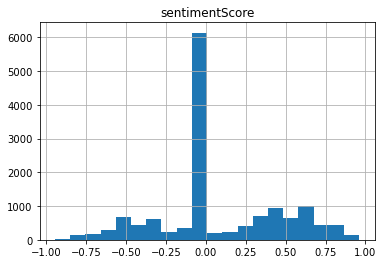

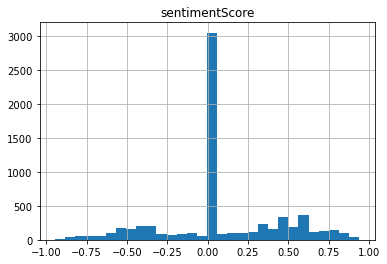

In [27]:
train_data.hist(column='sentimentScore', bins = 20)
fake_tweets.hist(column='sentimentScore', bins = 30)


array([[<AxesSubplot:title={'center':'sentimentScore'}>]], dtype=object)

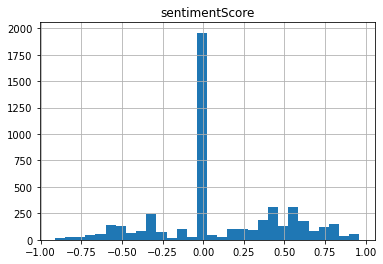

In [28]:
train_data[train_data['label'] == 'real'].hist(column='sentimentScore', bins = 30)


In [29]:
#extraction of feature - frequency count, then remove duplicates
train_data['frequency'] = train_data['tweetText'].map(train_data['tweetText'].value_counts())
train_data['frequency'].value_counts()
train_data.drop_duplicates(subset=['tweetText'], keep='first', inplace=True)
train_data[train_data['frequency'] > 5]


,tweetId,tweetText,userId,imageId(s),username,timestamp,label,length,cleanText,sentimentScore,frequency
94,262987536568311808,#hurricane #sandy,288927110,sandyA_fake_25,djenna_,Mon Oct 29 18:41:29 +0000 2012,fake,18,hurricane sandy,0.0000,11.0
766,262996943909822464,#sandy,443420281,sandyA_fake_15,leah9702,Mon Oct 29 19:18:52 +0000 2012,fake,7,sandy,0.0000,70.0
835,263001118928420864,#Sandy,84682265,sandyA_fake_09,javi1978,Mon Oct 29 19:35:27 +0000 2012,fake,7,sandy,0.0000,50.0
836,263210772228894720,#sandy #newyork,19613104,sandyA_fake_23,Ferriter,Tue Oct 30 09:28:32 +0000 2012,fake,16,sandy newyork,0.0000,12.0
856,263195243514580992,Акулы на улицах после Сэнди #sandy,60127942,sandyA_fake_11,nhodakov,Tue Oct 30 08:26:50 +0000 2012,fake,35,sharks streets sandy sandy,0.0000,10.0
1794,263254634792120320,"A shark was photographed swimming in the front yard of a flooded home in Brigantine Beach, New Jersey #sandy pic:",153014664,sandyA_fake_11,Franklinsh,Tue Oct 30 12:22:50 +0000 2012,fake,114,shark photographed swimming front yard flooded home brigantine beach new jersey sandy pic,0.0000,8.0
1927,263096083515842560,El huracán Sandy llevó un tiburón hasta las calles de New Jersey.,177770821,sandyA_fake_12,receballos,Tue Oct 30 01:52:49 +0000 2012,fake,66,Hurricane Sandy carried shark onto streets New Jersey,0.0000,8.0
2301,262965326428401664,Sandy,92343366,sandyA_fake_29,DaDaDiesel,Mon Oct 29 17:13:14 +0000 2012,fake,6,sandy,0.0000,32.0
2377,264358713643646976,"Dos tiburones en el metro de New Jersey, arrastrados por el Huracán Sandy. Flipante.",171526762,sandyB_fake_08,AlvaroLozano15,Fri Nov 02 13:30:03 +0000 2012,fake,85,two sharks new jersey subway washed away freaks hurricane sandy,-0.1027,12.0
2461,264228445679124481,"Obama tells marines they don't have to guard the Tomb of the Unknown Soldier due to Hurricane Sandy, they refuse. #usa",48785301,sandyA_fake_01,rockinridgway,Fri Nov 02 04:52:25 +0000 2012,fake,119,obama tells marines dont guard tomb unknown soldier due hurricane sandy refuse usa,-0.2960,6.0


In [30]:
#extraction of feature - frequency count, then remove duplicates
test_data['frequency'] = test_data['tweetText'].map(test_data['tweetText'].value_counts())
test_data['frequency'].value_counts()
test_data.drop_duplicates(subset=['tweetText'], keep='first', inplace=True)
test_data[test_data['frequency'] > 5]


,tweetId,tweetText,userId,imageId(s),username,timestamp,label,length,cleanText,sentimentScore,frequency
279,591407369332076544,'Samurai Ghost': Photo Shows Mysterious Boots Behind Girl,626592883,"samurai_01,samurai_02",anomalistnews,Fri Apr 24 01:04:39 +0000 2015,fake,59,samurai ghost photo shows mysterious boots behind girl,-0.3182,8
287,591419653278212096,'Samurai Ghost': Photo Shows Mysterious Boots Behind Girl,712620543,"samurai_01,samurai_02",kazem5t,Fri Apr 24 01:53:28 +0000 2015,fake,58,samurai ghost photo shows mysterious boots behind girl,-0.3182,11
321,591486673608781826,'Samurai Ghost': Photo shows mysterious boots behind girl #samurai #ghost.,273031537,samurai_02,tragab77,Fri Apr 24 06:19:46 +0000 2015,fake,75,samurai ghost photo shows mysterious boots behind girl samurai ghost,-0.5574,11
348,591381989539782656,'Samurai Ghost': Photo Shows Mysterious Boots Behind Girl - ABC News via @ABC,73293640,"samurai_01,samurai_02",rsun0525,Thu Apr 23 23:23:48 +0000 2015,fake,78,samurai ghost photo shows mysterious boots behind girl abc news via abc,-0.3182,25
399,590783181323776000,Samurai ghost photobombed little girl. Can you see it? --&gt; #GhoulishWednesday #KTM,2650465766,"samurai_01,samurai_02",CaitlinBell97,Wed Apr 22 07:44:21 +0000 2015,fake,87,samurai ghost photobombed little girl see ghoulishwednesday km,-0.3182,7
414,591287539245408256,'Samurai Ghost': Photo Shows Mysterious Boots Behind Girl via @GMA,467596457,samurai_02,MaryClayAuthor,Thu Apr 23 17:08:29 +0000 2015,fake,67,samurai ghost photo shows mysterious boots behind girl via gma,-0.3182,50
600,595426185724723201,#NepalEarthquake,2230961521,nepal_01,Cronopio60,Tue May 05 03:13:59 +0000 2015,fake,17,nepalearthquake,0.0000,9
853,591922990859825152,Dharahara Tower Then and Now: A History of Earthquakes in Nepal via @WSJIndia,976449991,nepal_24,PPatel108,Sat Apr 25 11:13:33 +0000 2015,real,78,dharahara tower history earthquakes nepal via wsjindia,0.0000,6
855,591928405769216000,Dharahara Tower then and now: A history of earthquakes in Nepal,124174094,nepal_24,Noatodo,Sat Apr 25 11:35:04 +0000 2015,real,64,dharahara tower history earthquakes nepal,0.0000,8
940,592026556337291265,"Nepal's historic Dharahara Tower collapses, trapping hundreds",603540902,nepal_25,NeedObamaAgain,Sat Apr 25 18:05:05 +0000 2015,real,62,nepal historic dharahara tower collapses trapping hundreds,-0.2960,19


In [31]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11738 entries, 0 to 14261
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweetId         11738 non-null  int64  
 1   tweetText       11737 non-null  object 
 2   userId          11738 non-null  int64  
 3   imageId(s)      11738 non-null  object 
 4   username        11738 non-null  object 
 5   timestamp       11738 non-null  object 
 6   label           11738 non-null  object 
 7   length          11738 non-null  int64  
 8   cleanText       11737 non-null  object 
 9   sentimentScore  11738 non-null  float64
 10  frequency       11737 non-null  float64
dtypes: float64(2), int64(3), object(6)
memory usage: 1.1+ MB


In [32]:
#delete tweets with empty text
train_data[train_data['length'] == 0]
train_data.drop(train_data[train_data.length == 0].index, inplace=True)

In [33]:
#delete tweets with empty text
test_data[test_data['length'] == 0]
test_data.drop(test_data[test_data.length == 0].index, inplace=True)

In [34]:
#extraction of other features - number of #s, number of @s, number of numbers, number of !s
def get_symbol_count(text,symbol):
    return text.count(symbol)

def get_num_numbers(text):
    return len(re.sub("[^0-9]", "", text))

#string = '¿Se a_cu4erdan de la pel!ícula: “El #dí6a después d7e mañana”? Me recuerda a lo que está pasando con el huracán #Sandy. http://t.co/JQQeRPwN'
#get_symbol_count(string,'!')
#print(get_num_numbers(string))

train_data['hashtagCount']= train_data['tweetText'].apply(lambda x: get_symbol_count(x,'#'))
train_data['mentionCount']= train_data['tweetText'].apply(lambda x: get_symbol_count(x,'@'))
train_data['exclamationMarkCount']= train_data['tweetText'].apply(lambda x: get_symbol_count(x,'!'))
train_data['numberCount']= train_data['tweetText'].apply(lambda x: get_num_numbers(x))

train_data.head(10)


,tweetId,tweetText,userId,imageId(s),username,timestamp,label,length,cleanText,sentimentScore,frequency,hashtagCount,mentionCount,exclamationMarkCount,numberCount
0,263046056240115712,¿Se acuerdan de la película: “El día después de mañana”? Me recuerda a lo que está pasando con el huracán #Sandy.,21226711,sandyA_fake_46,iAnnieM,Mon Oct 29 22:34:01 +0000 2012,fake,114,remember movie day tomorrow reminds happening hurricane sandy,0.0000,1.0,1,0,0,0
1,262995061304852481,"@milenagimon: Miren a Sandy en NY! Tremenda imagen del huracán. Parece el ""Día de la Independencia 2"" REAL! RT.",192378571,sandyA_fake_09,CarlosVerareal,Mon Oct 29 19:11:23 +0000 2012,fake,113,milenagimon look sandy ny tremendous image hurricane looks like independence day real rt,0.3612,1.0,0,1,2,1
2,262979898002534400,"Buena la foto del Huracán Sandy, me recuerda a la película Día de la Independencia #ID4 #Sandy",132303095,sandyA_fake_09,LucasPalape,Mon Oct 29 18:11:08 +0000 2012,fake,96,good picture hurricane sandy reminds movie independence day id sandy,0.4404,1.0,2,0,0,1
3,262996108400271360,Scary shit #hurricane #NY,241995902,sandyA_fake_29,Haaaaarryyy,Mon Oct 29 19:15:33 +0000 2012,fake,26,scary shit hurricane ny,-0.7783,1.0,2,0,0,0
4,263018881839411200,My fave place in the world #nyc #hurricane #sandy #statueofliberty 🗽,250315890,sandyA_fake_15,princess__natt,Mon Oct 29 20:46:02 +0000 2012,fake,69,have place world nyc hurricane sandy statueofliberty,0.0000,1.0,4,0,0,0
5,263364439582060545,42nd #time #square #NYC #subway #hurricane,163674788,sandyA_fake_23,classycg,Tue Oct 30 19:39:10 +0000 2012,fake,43,nd time square nyc subway hurricane,0.0000,1.0,5,0,0,2
6,262927032705490944,Just in time for #halloween a photo of #hurricane #sandy #frankenstorm,246153081,sandyA_fake_14,j_unit87,Mon Oct 29 14:41:04 +0000 2012,fake,71,time halloween photo hurricane sandy frankenstorm,0.0000,1.0,4,0,0,0
7,263321078884077568,Crazy pic of #Hurricane #Sandy prayers go out to family and friends on the East Coast,199565482,sandyA_fake_29,MrBlakMagik,Tue Oct 30 16:46:52 +0000 2012,fake,86,crazy pic hurricane sandy prayers go family friends east coast,0.1779,1.0,2,0,0,0
8,263111677485142017,#sandy #newyork #hurricane #statueofliberty #USA,78475739,sandyA_fake_15,safi37,Tue Oct 30 02:54:46 +0000 2012,fake,49,sandy newyork hurricane statueofliberty usa,0.0000,1.0,5,0,0,0
9,262977091983785985,#nyc #hurricane,869777653,sandyA_fake_29,kingmichael03,Mon Oct 29 17:59:59 +0000 2012,fake,16,nyc hurricane,0.0000,1.0,2,0,0,0


In [35]:
train_data['frequency'].value_counts()

1.0     10714
2.0       688
3.0       144
4.0        49
5.0        35
6.0        22
8.0        13
7.0        12
12.0        9
11.0        8
10.0        8
13.0        6
14.0        4
17.0        4
15.0        3
36.0        2
9.0         2
32.0        2
19.0        2
27.0        2
16.0        2
23.0        1
42.0        1
33.0        1
70.0        1
29.0        1
50.0        1
Name: frequency, dtype: int64

In [36]:
#extraction of other features - number of #s, number of @s, number of numbers, number of !s
def get_symbol_count(text,symbol):
    return text.count(symbol)

def get_num_numbers(text):
    return len(re.sub("[^0-9]", "", text))

#string = '¿Se a_cu4erdan de la pel!ícula: “El #dí6a después d7e mañana”? Me recuerda a lo que está pasando con el huracán #Sandy. http://t.co/JQQeRPwN'
#get_symbol_count(string,'!')
#print(get_num_numbers(string))

test_data['hashtagCount']= test_data['tweetText'].apply(lambda x: get_symbol_count(x,'#'))
test_data['mentionCount']= test_data['tweetText'].apply(lambda x: get_symbol_count(x,'@'))
test_data['exclamationMarkCount']= test_data['tweetText'].apply(lambda x: get_symbol_count(x,'!'))
test_data['numberCount']= test_data['tweetText'].apply(lambda x: get_num_numbers(x))

test_data.head(10)


,tweetId,tweetText,userId,imageId(s),username,timestamp,label,length,cleanText,sentimentScore,frequency,hashtagCount,mentionCount,exclamationMarkCount,numberCount
0,578854927457349632,kereeen RT @Shyman33: Eclipse from ISS....,70824972,eclipse_01,peay_s,Fri Mar 20 09:45:43 +0000 2015,fake,43,kereeen rt shaman eclipse iss,0.0000,1,0,1,0,2
1,578874632670953472,Absolutely beautiful! RT @Shyman33: Eclipse from ISS....,344707006,eclipse_01,JaredUcanChange,Fri Mar 20 11:04:02 +0000 2015,fake,57,absolutely beautiful rt shaman eclipse iss,0.6361,1,0,1,1,2
2,578891261353984000,“@Shyman33: Eclipse from ISS.... 우주에서본 3.20 일식 Wow! amazing!,224839607,eclipse_01,tpjp1231,Fri Mar 20 12:10:06 +0000 2015,fake,61,shaman eclipse iss eclipse seen space wow amazing,0.8225,1,0,1,2,5
3,578846612312748032,Eclipse from ISS....,134543073,eclipse_01,Shyman33,Fri Mar 20 09:12:41 +0000 2015,fake,21,eclipse iss,0.0000,1,0,0,0,0
4,578975333841551360,@ebonfigli: Éclipse vue de l'ISS... Autre chose... création divine n'a pas de limite 😍,1150728872,eclipse_01,Epimethee_,Fri Mar 20 17:44:11 +0000 2015,fake,87,ebonfigli eclipse view list something else divine creation limit,0.6908,2,0,1,0,0
5,579274670853226496,“@ebonfigli: Éclipse vue de l'ISS... Autre chose...,470889709,eclipse_01,BusineMi,Sat Mar 21 13:33:38 +0000 2015,fake,52,ebonfigli eclipse view list something else,0.0000,1,0,1,0,0
6,578861590482665472,Éclipse vue de l'ISS... Autre chose...,383831305,eclipse_01,ebonfigli,Fri Mar 20 10:12:12 +0000 2015,fake,39,eclipse view list something else,0.0000,1,0,0,0,0
8,578844275061981184,Dit dus \0/ RT “@News_Executive: The Solar eclipse seen from International Space Station. #SolarEclipse #ISS #Space,291020879,eclipse_01,PatriciaKusters,Fri Mar 20 09:03:24 +0000 2015,fake,116,dit us rt news_executive solar eclipse seen international space station solareclipse iss space,0.0000,1,3,1,0,1
9,578838737448235008,Photo: The Solar eclipse as seen from the International Space Station. #SolarEclipse #ISS #Space,364810202,eclipse_01,News_Executive,Fri Mar 20 08:41:23 +0000 2015,fake,97,photo solar eclipse seen international space station solareclipse iss space,0.0000,1,3,0,0,0
10,579130328339623936,"“@planetepics: A solar eclipse, viewed from the I.S.S. cool. Eclipse from ISS",2187345679,eclipse_01,CowlesR,Sat Mar 21 04:00:04 +0000 2015,fake,78,planetepics solar eclipse viewed iss cool eclipse iss,0.3182,1,0,1,0,0


In [37]:
#convert label to 0 or 1
def assign_label(label):
    if label == 'real':
        return 1
    else:
        return 0
    
train_data['label'] = train_data['label'].apply(lambda x: assign_label(x))
train_data.head()

,tweetId,tweetText,userId,imageId(s),username,timestamp,label,length,cleanText,sentimentScore,frequency,hashtagCount,mentionCount,exclamationMarkCount,numberCount
0,263046056240115712,¿Se acuerdan de la película: “El día después de mañana”? Me recuerda a lo que está pasando con el huracán #Sandy.,21226711,sandyA_fake_46,iAnnieM,Mon Oct 29 22:34:01 +0000 2012,0,114,remember movie day tomorrow reminds happening hurricane sandy,0.0000,1.0,1,0,0,0
1,262995061304852481,"@milenagimon: Miren a Sandy en NY! Tremenda imagen del huracán. Parece el ""Día de la Independencia 2"" REAL! RT.",192378571,sandyA_fake_09,CarlosVerareal,Mon Oct 29 19:11:23 +0000 2012,0,113,milenagimon look sandy ny tremendous image hurricane looks like independence day real rt,0.3612,1.0,0,1,2,1
2,262979898002534400,"Buena la foto del Huracán Sandy, me recuerda a la película Día de la Independencia #ID4 #Sandy",132303095,sandyA_fake_09,LucasPalape,Mon Oct 29 18:11:08 +0000 2012,0,96,good picture hurricane sandy reminds movie independence day id sandy,0.4404,1.0,2,0,0,1
3,262996108400271360,Scary shit #hurricane #NY,241995902,sandyA_fake_29,Haaaaarryyy,Mon Oct 29 19:15:33 +0000 2012,0,26,scary shit hurricane ny,-0.7783,1.0,2,0,0,0
4,263018881839411200,My fave place in the world #nyc #hurricane #sandy #statueofliberty 🗽,250315890,sandyA_fake_15,princess__natt,Mon Oct 29 20:46:02 +0000 2012,0,69,have place world nyc hurricane sandy statueofliberty,0.0000,1.0,4,0,0,0


In [38]:
#convert label to 0 or 1
def assign_label(label):
    if label == 'real':
        return 1
    else:
        return 0
    
test_data['label'] = test_data['label'].apply(lambda x: assign_label(x))
test_data.head()



,tweetId,tweetText,userId,imageId(s),username,timestamp,label,length,cleanText,sentimentScore,frequency,hashtagCount,mentionCount,exclamationMarkCount,numberCount
0,578854927457349632,kereeen RT @Shyman33: Eclipse from ISS....,70824972,eclipse_01,peay_s,Fri Mar 20 09:45:43 +0000 2015,0,43,kereeen rt shaman eclipse iss,0.0000,1,0,1,0,2
1,578874632670953472,Absolutely beautiful! RT @Shyman33: Eclipse from ISS....,344707006,eclipse_01,JaredUcanChange,Fri Mar 20 11:04:02 +0000 2015,0,57,absolutely beautiful rt shaman eclipse iss,0.6361,1,0,1,1,2
2,578891261353984000,“@Shyman33: Eclipse from ISS.... 우주에서본 3.20 일식 Wow! amazing!,224839607,eclipse_01,tpjp1231,Fri Mar 20 12:10:06 +0000 2015,0,61,shaman eclipse iss eclipse seen space wow amazing,0.8225,1,0,1,2,5
3,578846612312748032,Eclipse from ISS....,134543073,eclipse_01,Shyman33,Fri Mar 20 09:12:41 +0000 2015,0,21,eclipse iss,0.0000,1,0,0,0,0
4,578975333841551360,@ebonfigli: Éclipse vue de l'ISS... Autre chose... création divine n'a pas de limite 😍,1150728872,eclipse_01,Epimethee_,Fri Mar 20 17:44:11 +0000 2015,0,87,ebonfigli eclipse view list something else divine creation limit,0.6908,2,0,1,0,0


In [39]:
#vectorizer = TfidfVectorizer()


In [44]:
# initialise model and vectorizers
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer



#basic svc classifier
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LinearSVC())
])

svc_model = pipeline.fit(train_data['cleanText'],train_data['label'])
svc_pred = svc_model.predict(test_data['cleanText'])
svc_f1 = f1_score(test_data['label'], svc_pred, average="micro")
print(svc_f1)

0.6996996996996997


In [48]:
#naive bayes
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
])


nb_model = pipeline.fit(train_data['cleanText'], train_data['label'])
nb_pred = nb_model.predict(test_data['cleanText'])
nb_f1 = f1_score(test_data['label'], nb_pred, average="micro")
print(nb_f1)




0.7932932932932933


In [64]:
from sklearn import svm

#different gamma values for rbf kernel
gammas = [0.001,0.01,0.1, 1, 10, 100]
for gamma in gammas:
    svc = svm.SVC(kernel='rbf', gamma=gamma)
    pipeline = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', svc)
    ])


    rbf_model = pipeline.fit(train_data['cleanText'], train_data['label'])
    rbf_pred = rbf_model.predict(test_data['cleanText'])
    rbf_f1 = f1_score(test_data['label'], rbf_pred, average="micro")
    print(rbf_f1)


#using different variations of svm

0.7127127127127126
0.7132132132132132
0.7017017017017017
0.6796796796796797
0.7137137137137137
0.7127127127127126
0.7127127127127126


In [63]:
from sklearn import svm

#c values for rbf kernel
C = [0.1, 1, 10, 100, 1000]
for c in C:
    svc = svm.SVC(kernel='rbf', C=c)
    pipeline = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', svc)
    ])


    rbf_model = pipeline.fit(train_data['cleanText'], train_data['label'])
    rbf_pred = rbf_model.predict(test_data['cleanText'])
    rbf_f1 = f1_score(test_data['label'], rbf_pred, average="micro")
    print('C value of ' + str(c) + ' ' + str(rbf_f1))


#using different variations of svm

C value of 0.1 0.7132132132132132
C value of 1 0.6796796796796797
C value of 10 0.7357357357357357
C value of 100 0.7332332332332332
C value of 1000 0.7332332332332332


In [71]:
from sklearn.model_selection import GridSearchCV

#grid search for rbf
# defining parameter range
params={'clf__C':[0.1, 1, 10, 100, 1000],
        'clf__gamma':[10,5,1, 0.1, 0.01, 0.001, 0.0001]}

svc = svm.SVC(kernel='rbf')


pipeline = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', svc)
])

#grid = GridSearchCV(pipeline, cv=10,param_grid=params)
#grid.fit(train_data['cleanText'], train_data['label'])
#grid_pred = grid.predict(test_data['cleanText'])
#grid_f1 = f1_score(test_data['label'], grid_pred, average="micro")
#print('grid search for rbf: ' + grid_f1)
 
 

KeyboardInterrupt: 

0.7357357357357357


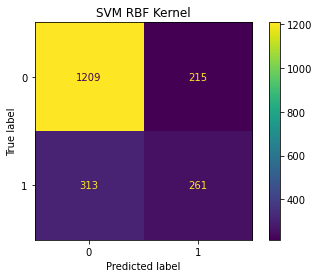

In [110]:
#best performing rbf kernel SVM

from sklearn.model_selection import GridSearchCV
 
svc = svm.SVC(kernel='rbf',C=10,gamma=1)


pipeline = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', svc)
])

best_rbf_model = pipeline.fit(train_data['cleanText'], train_data['label'])
best_rbf_pred = best_rbf_model.predict(test_data['cleanText'])
best_rbf_f1 = f1_score(test_data['label'], best_rbf_pred, average="micro")
print(best_rbf_f1)
plot_confusion_matrix(best_rbf_model, test_data['cleanText'], test_data['label'])
plt.title("SVM RBF Kernel")

plt.savefig('svmrbf.png')


 
 

In [120]:
from sklearn.compose import ColumnTransformer


#different poly kernel degrees for cleanText and length
degrees = [0, 1, 2, 3, 4, 5, 6]
for degree in degrees:
    # Set X and y
    X = train_data[['cleanText', 'length']]
    y = train_data['label']

    # initialise model and vectorizers
    svc = svm.SVC(kernel='poly', degree=degree)
    vectorizer1 = TfidfTransformer()

    # construct the column transfomer
    column_transformer = ColumnTransformer(
        [('tfidf1', vectorizer1, 'cleanText'),remainder='passthrough')])

    # fit the model
    pipe = Pipeline([
                      ('tfidf', column_transformer),
                      ('classify', model)
                    ])
    both_model = pipe.fit(X,y)
    both_pred = both_model.predict(test_data[['cleanText', 'length']])
    both_f1 = f1_score(test_data['label'], both_pred, average="micro")
    print('degree = ' + str(degree) + ' f1 = ' + str(both_f1))
    





NameError: name 'model' is not defined

In [80]:
#different poly kernel degrees
degrees = [0, 1, 2, 3, 4, 5, 6]
for degree in degrees:
    svc = svm.SVC(kernel='poly', degree=degree)
    pipeline = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', svc)
    ])


    poly_model = pipeline.fit(train_data['cleanText'], train_data['label'])
    poly_pred = poly_model.predict(test_data['cleanText'])
    poly_f1 = f1_score(test_data['label'], poly_pred, average="micro")
    print('degree = ' + str(degree) + ' f1 = ' + str(poly_f1))


degree = 0 f1 = 0.7127127127127126
degree = 1 f1 = 0.7417417417417418
degree = 2 f1 = 0.6711711711711712
degree = 3 f1 = 0.7052052052052052
degree = 4 f1 = 0.7117117117117117
degree = 5 f1 = 0.7127127127127126
degree = 6 f1 = 0.7127127127127126


In [89]:
#different gamma values for poly kernel
gammas = [0.01,0.8, 1,1.5,1.2 ,2]

for gamma in gammas:
    svc = svm.SVC(kernel='poly',degree=1, gamma=gamma)
    pipeline = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', svc)
    ])


    poly_model = pipeline.fit(train_data['cleanText'], train_data['label'])
    poly_pred = poly_model.predict(test_data['cleanText'])
    poly_f1 = f1_score(test_data['label'], poly_pred, average="micro")
    print('Gamma value of ' + str(gamma) + ' ' + str(poly_f1))


Gamma value of 0.01 0.7127127127127126
Gamma value of 0.8 0.7332332332332332
Gamma value of 1 0.7412412412412412
Gamma value of 1.5 0.7262262262262263
Gamma value of 1.2 0.7382382382382382
Gamma value of 2 0.7162162162162162


0.7417417417417418


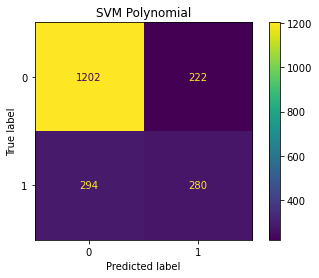

In [112]:
svc = svm.SVC(kernel='poly',degree=1)
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', svc)
])


poly_model = pipeline.fit(train_data['cleanText'], train_data['label'])
poly_pred = poly_model.predict(test_data['cleanText'])
poly_f1 = f1_score(test_data['label'], poly_pred, average="micro")
print(poly_f1)
plot_confusion_matrix(poly_model, test_data['cleanText'], test_data['label'])
plt.title("SVM Polynomial")

plt.savefig('svmpoly.png')

In [95]:
#different C values for linear
C = [0.1, 1, 10, 100, 1000]
for c in C:
    svc = svm.SVC(kernel='linear', C=c)
    pipeline = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', svc)
    ])


    rbf_model = pipeline.fit(train_data['cleanText'], train_data['label'])
    rbf_pred = rbf_model.predict(test_data['cleanText'])
    rbf_f1 = f1_score(test_data['label'], rbf_pred, average="micro")
    print('C value of ' + str(c) + ' ' + str(rbf_f1))

#untuned poly = 0.7052052052052052
#untuned linear = 0.7412412412412412
#untuned rbf = 0.6796796796796797



C value of 0.1 0.7102102102102102
C value of 1 0.7412412412412412
C value of 10 0.44844844844844844
C value of 100 0.6306306306306306
C value of 1000 0.6271271271271271


In [96]:
#different C values for linear
gammas = [0.001,0.01,0.1, 1, 10, 100]
for gamma in gammas:
    svc = svm.SVC(kernel='linear', gamma=gamma)
    pipeline = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', svc)
    ])


    rbf_model = pipeline.fit(train_data['cleanText'], train_data['label'])
    rbf_pred = rbf_model.predict(test_data['cleanText'])
    rbf_f1 = f1_score(test_data['label'], rbf_pred, average="micro")
    print(rbf_f1)

0.7412412412412412
0.7412412412412412
0.7412412412412412
0.7412412412412412
0.7412412412412412
0.7412412412412412


In [101]:
from sklearn.model_selection import GridSearchCV


 
# defining parameter range
params={'tfidf__max_df': [0.25, 0.5, 0.75],
        'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)]}

svc = svm.SVC(kernel='linear')


pipeline = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', svc)
])

grid = GridSearchCV(pipeline,param_grid=params)
grid.fit(train_data['cleanText'], train_data['label'])
grid_pred = grid.predict(test_data['cleanText'])
grid_f1 = f1_score(test_data['label'], grid_pred, average="micro")
print('grid search for linear: ' + grid_f1)
 
 

C:\Users\44784\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\44784\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\44784\anaconda3\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\44784\anaconda3\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\44784\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\44784\anaconda3\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File 

C:\Users\44784\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\44784\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\44784\anaconda3\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\44784\anaconda3\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\44784\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\44784\anaconda3\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File 

C:\Users\44784\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\44784\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\44784\anaconda3\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\44784\anaconda3\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\44784\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\44784\anaconda3\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File 

C:\Users\44784\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\44784\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\44784\anaconda3\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\44784\anaconda3\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\44784\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\44784\anaconda3\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File 

C:\Users\44784\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\44784\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\44784\anaconda3\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\44784\anaconda3\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\44784\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\44784\anaconda3\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File 

C:\Users\44784\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\44784\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\44784\anaconda3\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\44784\anaconda3\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\44784\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\44784\anaconda3\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File 

C:\Users\44784\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\44784\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\44784\anaconda3\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\44784\anaconda3\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\44784\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\44784\anaconda3\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File 

C:\Users\44784\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\44784\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\44784\anaconda3\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\44784\anaconda3\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\44784\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\44784\anaconda3\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File 

C:\Users\44784\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\44784\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\44784\anaconda3\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\44784\anaconda3\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\44784\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\44784\anaconda3\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File 

AttributeError: lower not found

0.7412412412412412


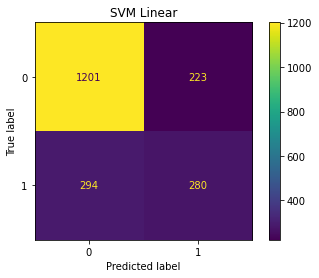

In [113]:
svc = svm.SVC(kernel='linear', gamma=gamma)
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', svc)
])


lin_model = pipeline.fit(train_data['cleanText'], train_data['label'])
lin_pred = lin_model.predict(test_data['cleanText'])
lin_f1 = f1_score(test_data['label'], lin_pred, average="micro")
print(lin_f1)
plot_confusion_matrix(lin_model, test_data['cleanText'], test_data['label'])
plt.title("SVM Linear")

plt.savefig('svmlinear.png')

In [127]:
from sklearn.ensemble import VotingClassifier

#naive bayes
naive_pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
])

svc = svm.SVC(kernel='linear', gamma=gamma)
svc_pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', svc)
])

random_pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier())
])

classifiers = [
    ("svm", svc_pipeline),
    ("naive", naive_pipeline),
    ("rand",random_pipeline),
]
 
mixed_pipe = Pipeline([
    ("voting", VotingClassifier(classifiers, voting="soft"))
])

voting_model = mixed_pipe.fit(train_data['cleanText'], train_data['label'])
voting_pred = voting_model.predict(test_data['cleanText'])
voting_f1 = f1_score(test_data['label'], voting_pred, average="micro")
print(voting_f1)

AttributeError: predict_proba is not available when  probability=False

In [129]:
#naive bayes
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
])



nb_model = pipeline.fit(train_data['cleanText'] + ' ' + train_data['imageId(s)'], train_data['label'])
nb_pred = nb_model.predict(test_data['cleanText'] + ' ' + train_data['imageId(s)'])
nb_f1 = f1_score(test_data['label'], nb_pred, average="micro")
print(nb_f1)




ValueError: np.nan is an invalid document, expected byte or unicode string.

In [122]:
#random forest
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier())
])


rf_model = pipeline.fit(train_data['cleanText'], train_data['label'])
rf_pred = rf_model.predict(test_data['cleanText'])
rf_f1 = f1_score(test_data['label'], rf_pred, average="micro")
print(rf_f1)


0.7067067067067067


In [123]:
#linear svc
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LinearSVC())
])


lin_svc_model = pipeline.fit(train_data['cleanText'], train_data['label'])
lin_svc_pred = lin_svc_model.predict(test_data['cleanText'])
lin_svc_f1 = f1_score(test_data['label'], lin_svc_pred, average="micro")
print(lin_svc_f1)


0.6996996996996997
